富士山下山問題

In [64]:
import os
os.getcwd()
import numpy as np
csv_path = "/content/drive/MyDrive/DIC/mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
fuji2 = fuji[0:140]
# print(fuji[130:140])
print(fuji2)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 [    3.          35.139194   139.123441     0.         966.      ]
 [    4.          35.140878   139.12056      0.        1288.      ]
 [    5.          35.142562   139.117679     0.        1611.      ]
 [    6.          35.144246   139.114799     6.62      1933.      ]
 [    7.          35.145929   139.111917     7.21      2255.      ]
 [    8.          35.147613   139.109036    12.2       2577.      ]
 [    9.          35.149297   139.106155    54.41      2899.      ]
 [   10.          35.15098    139.103273   171.56      3222.      ]
 [   11.          35.152664   139.100392   177.84      3544.      ]
 [   12.          35.154347   139.09751    228.21      3866.      ]
 [   13.          35.15603    139.094628   275.38      4188.      ]
 [   14.          35.157714   139.091747   433.7

【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。



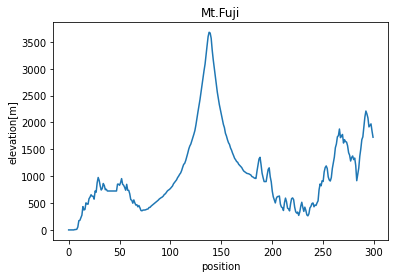

In [65]:
# # fuji[:,[0,3]]
import matplotlib.pyplot as plt
import numpy as np
# plt.plot(fuji[:,[0,3]])
plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# /*実際にグラフに出力*/
plt.show()

【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。



In [66]:
#求める関数をKOUBAI、勾配変数をkoubaiとする
import matplotlib.pyplot as plt
import numpy as np

# print(fuji[131:132,[3]]) 
# print(fuji[130:131,[3]]) 
# print(fuji[131:132,[0]]) 
# print(fuji[130:131,[0]])
# print(fuji[0:2,[0]])
# def KOUBAI((fuji[0:1,[0]]),(fuji[1:2,[0]]),(fuji[0:1,[3]]),(fuji[1:2,[3]])):
fujix = fuji[:,[0]]
# print(fujix)
fujiy = fuji[:,[3]]
# print(fujiy)
num = 0
koubai = []
#今いる地点point1とする
# def KOUBAI(fuji,point1):
def KOUBAI(point1):
  for i in range(point1,1,-1):
    num = (fujiy[i-1] - fujiy[i]) / (fujix[i-1] - fujix[i])
    # print(num)
    koubai.append(num)
  # print(koubai)
  return koubai
#point1を１３６とすると
point1 = 136
# KOUBAI(fuji,point1)
KOUBAI(point1)

[array([168.35]),
 array([178.43]),
 array([119.91]),
 array([142.35]),
 array([122.45]),
 array([139.7]),
 array([137.3]),
 array([119.25]),
 array([110.32]),
 array([120.38]),
 array([122.67]),
 array([103.46]),
 array([68.04]),
 array([55.48]),
 array([67.07]),
 array([61.07]),
 array([36.42]),
 array([55.28]),
 array([76.91]),
 array([69.65]),
 array([67.58]),
 array([52.55]),
 array([20.11]),
 array([53.28]),
 array([60.78]),
 array([46.11]),
 array([25.35]),
 array([34.1]),
 array([26.92]),
 array([40.58]),
 array([22.24]),
 array([26.61]),
 array([25.27]),
 array([41.]),
 array([22.37]),
 array([22.67]),
 array([18.9]),
 array([12.51]),
 array([15.45]),
 array([25.57]),
 array([27.79]),
 array([11.93]),
 array([28.72]),
 array([18.67]),
 array([10.68]),
 array([13.37]),
 array([13.92]),
 array([21.43]),
 array([17.1]),
 array([17.]),
 array([14.44]),
 array([16.7]),
 array([16.58]),
 array([13.16]),
 array([15.66]),
 array([22.4]),
 array([2.19]),
 array([28.27]),
 array([3.5]),

【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。


数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。


「今いる地点の勾配」は問題2で作成した関数の戻り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。


《実装上の注意》


上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

In [67]:
# from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
#移動先の地点を計算する関数を作成 今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数名をDestination_point(移動先の地点)とする
#移動先の地点 = 今いる地点(fuji[i : i + 1,[0]]=fujix[0]と置く) - α(=0.2) ×今いる地点の勾配(問２からkoubaiと置く)

fujix = fuji[:,[0]]
# fujix = fuji[0:137,[0]]
# print(fujix)
fujiy = fuji[:,[3]]
# print(fujiy)

point1 = 136
koubai = KOUBAI(point1)

#今いる地点point2とする 
num2 = 0
Destination_point2 = []
def Destination_point(point2):
  for i in range(point2,1,-1):
    num2= fujix[i]  - 0.2 * koubai[i]
    if(num2<0):
      num2 = int(np.round(np.abs(num2)))
      Destination_point2.append(num2)
    else:
      num2 =int(np.round(num2))
      Destination_point2.append(num2)
    
  return Destination_point2

# point2 = 136
# Destination_point(point2)


【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の戻り値としてください。


最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。


《実装上の注意》


問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [68]:
#「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」
#山を下る関数を作成 山を下る関数：Create a function that goes down the mountain Function that goes down the mountain
#略して、Goes_down_the_mountainとする
#関数の戻り値を移動毎の地点：Point_for_each_moveとする


fujix = fuji[:,[0]]
# print(fujix)
fujiy = fuji[:,[3]]
# print(fujiy)
Point_for_each_move = []
# point2 = 136
def Goes_down_the_mountain(point2):
  return Destination_point(point2)

point2 = 136
Goes_down_the_mountain(point2)

[100,
 101,
 134,
 133,
 132,
 131,
 129,
 129,
 127,
 119,
 103,
 124,
 114,
 114,
 90,
 133,
 118,
 94,
 122,
 119,
 95,
 109,
 105,
 118,
 112,
 122,
 80,
 113,
 72,
 88,
 117,
 125,
 119,
 97,
 83,
 109,
 116,
 97,
 104,
 97,
 96,
 95,
 94,
 93,
 92,
 91,
 90,
 89,
 62,
 87,
 90,
 75,
 69,
 104,
 86,
 89,
 90,
 57,
 100,
 77,
 89,
 97,
 76,
 84,
 60,
 82,
 78,
 68,
 76,
 62,
 74,
 75,
 65,
 60,
 62,
 61,
 59,
 57,
 57,
 51,
 56,
 51,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 43,
 43,
 42,
 42,
 39,
 36,
 39,
 34,
 34,
 35,
 34,
 32,
 30,
 30,
 25,
 27,
 26,
 26,
 21,
 23,
 20,
 21,
 16,
 12,
 12,
 18,
 10,
 6,
 5,
 3,
 6,
 9,
 3,
 1,
 2,
 2,
 10,
 15,
 15,
 14,
 17,
 21,
 23,
 20,
 25,
 22]

【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。


《可視化例》


断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

[100, 101, 134, 133, 132, 131, 129, 129, 127, 119, 103, 124, 114, 114, 90, 133, 118, 94, 122, 119, 95, 109, 105, 118, 112, 122, 80, 113, 72, 88, 117, 125, 119, 97, 83, 109, 116, 97, 104, 97, 96, 95, 94, 93, 92, 91, 90, 89, 62, 87, 90, 75, 69, 104, 86, 89, 90, 57, 100, 77, 89, 97, 76, 84, 60, 82, 78, 68, 76, 62, 74, 75, 65, 60, 62, 61, 59, 57, 57, 51, 56, 51, 51, 50, 49, 48, 47, 46, 45, 43, 43, 42, 42, 39, 36, 39, 34, 34, 35, 34, 32, 30, 30, 25, 27, 26, 26, 21, 23, 20, 21, 16, 12, 12, 18, 10, 6, 5, 3, 6, 9, 3, 1, 2, 2, 10, 15, 15, 14, 17, 21, 23, 20, 25, 22, 100, 101, 134, 133, 132, 131, 129, 129, 127, 119, 103, 124, 114, 114, 90, 133, 118, 94, 122, 119, 95, 109, 105, 118, 112, 122, 80, 113, 72, 88, 117, 125, 119, 97, 83, 109, 116, 97, 104, 97, 96, 95, 94, 93, 92, 91, 90, 89, 62, 87, 90, 75, 69, 104, 86, 89, 90, 57, 100, 77, 89, 97, 76, 84, 60, 82, 78, 68, 76, 62, 74, 75, 65, 60, 62, 61, 59, 57, 57, 51, 56, 51, 51, 50, 49, 48, 47, 46, 45, 43, 43, 42, 42, 39, 36, 39, 34, 34, 35, 34, 32, 

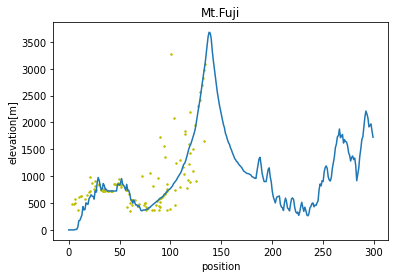

In [69]:
fujix = fuji[:,[0]]
# print(fujix)
fujiy = fuji[:,[3]]
# print(fujiy)

point2 = 136
# Goes_down_the_mountain(point2)
# print(Goes_down_the_mountain(point2))

Point_for_each_move = []
Pointy = []

def Goes_down_the_mountain2(point2):
  for j in range(point2,0,-1):
    Pointy.append(int(np.round(fujiy[j])))
  return Pointy
      

point2 = 136
Goes_down_the_mountain(point2)
Pointy = Goes_down_the_mountain2(point2)
print(Goes_down_the_mountain(point2))
print(Pointy)


import matplotlib.pyplot as plt
import numpy as np

for i in range(120,0,-1):
  plt.plot(Goes_down_the_mountain(point2)[i],Pointy[i],marker='.',color = 'y',markersize = 3)

plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# /*実際にグラフに出力*/
plt.show()

【問題6】初期値の変更
問題4では最初の「今いる地点」を136と固定しましたが、これを他の全ての点で計算してください。具体的には、「今いる地点」を変更できるようにするということです。

In [70]:
fujix = fuji[:,[0]]
# print(fujix)
fujiy = fuji[:,[3]]
# print(fujiy)
Point_for_each_move = []
#j2は、今いる地点で自由に変更できる
def Goes_down_the_mountain(j2,fuji):
  for j in range(j2,0,-1):
    koubai = (fujiy[j-1] - fujiy[j]) / (fujix[j-1] - fujix[j])
    Destination_point = (fujix[j]) - 0.2 * koubai
    # print(Destination_point)
    if(Destination_point < 0):
      np.delete(Destination_point, np.where(Destination_point < 0))
    else:
      Point_for_each_move.append(int(np.round(Destination_point)))  #(fuji[i : i + 1,[0]])
  return Point_for_each_move

j2 = 10
Goes_down_the_mountain(10,fuji)

[1, 7, 7, 5, 5, 4, 3, 2, 1]

【問題7】初期値ごとの下山過程の可視化
問題6では全初期値の下山過程を計算しました。そこで、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。勾配降下法において 初期値 が結果に影響を与えることが確認できます。


《初期値とは》


今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なる斜面を下ることになります。

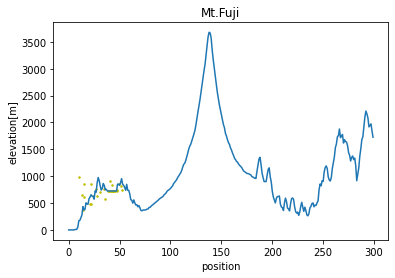

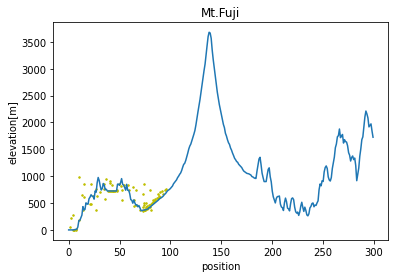

In [71]:
#いくつかの初期値j2とあるので、50と１0０にします。

#j2=50の場合
fujix = fuji[:,[0]]
# print(fujix)
fujiy = fuji[:,[3]]
# print(fujiy)
Point_for_each_move = []
Pointy = []
def Goes_down_the_mountain(fuji):
  for j in range(50,0,-1):
    koubai = (fujiy[j-1] - fujiy[j]) / (fujix[j-1] - fujix[j])
    Destination_point = (fujix[j]) - 0.2 * koubai
    # print(Destination_point)
    if(Destination_point < 0):
      np.delete(Destination_point, np.where(Destination_point < 0))
    else:
      Point_for_each_move.append(int(np.round(Destination_point))) 
      Pointy.append(int(np.round(fujiy[j])))
  return Point_for_each_move , Pointy

Point_for_each_move , Pointy = Goes_down_the_mountain(fuji)

import matplotlib.pyplot as plt
import numpy as np

for i in range(30,0,-1):
  plt.plot(Point_for_each_move[i],Pointy[i],marker='.',color = 'y',markersize = 3)

plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# /*実際にグラフに出力*/
plt.show()



#j2=100の場合
fujix = fuji[:,[0]]
# print(fujix)
fujiy = fuji[:,[3]]
# print(fujiy)
Point_for_each_move = []
Pointy = []
def Goes_down_the_mountain(fuji):
  for j in range(100,0,-1):
    koubai = (fujiy[j-1] - fujiy[j]) / (fujix[j-1] - fujix[j])
    Destination_point = (fujix[j]) - 0.2 * koubai
    # print(Destination_point)
    if(Destination_point < 0):
      np.delete(Destination_point, np.where(Destination_point < 0))
    else:
      Point_for_each_move.append(int(np.round(Destination_point))) 
      Pointy.append(int(np.round(fujiy[j])))
  return Point_for_each_move , Pointy

Point_for_each_move , Pointy = Goes_down_the_mountain(fuji)

import matplotlib.pyplot as plt
import numpy as np

for i in range(90,0,-1):
  plt.plot(Point_for_each_move[i],Pointy[i],marker='.',color = 'y',markersize = 3)

plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# /*実際にグラフに出力*/
plt.show()

【問題8】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。



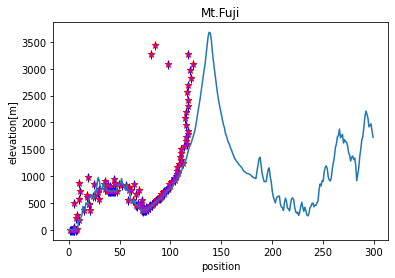

In [72]:
#「移動先の地点＝今いる地点ーα×今いる地点の勾配」　移動先の地点＞０より以下のことが言える
#α＞０
#移動先の地点＞０よって、今いる地点＞α×今いる地点の勾配
#αを0.1,0.3,0.5,0.7,0.9と変換させて、どのような下山過程になるか調べる

fujix = fuji[:,[0]]
# print(fujix)
fujiy = fuji[:,[3]]
# print(fujiy)
Point_for_each_move = []
Pointy = []
def Goes_down_the_mountain(α,fuji):
  for j in range(136,0,-1):
    koubai = (fujiy[j-1] - fujiy[j]) / (fujix[j - 1] - fujix[j])
    Destination_point = (fujix[j]) - α * koubai
    # print(Destination_point)
    if(Destination_point < 0):
      np.delete(Destination_point, np.where(Destination_point < 0))
    else:
      Point_for_each_move.append(int(np.round(Destination_point))) 
      Pointy.append(int(np.round(fujiy[j])))
  return Point_for_each_move , Pointy


#α=0.1の場合
Point_for_each_move , Pointy = Goes_down_the_mountain(0.1,fuji)
#α=0.3の場合
Point_for_each_move2 , Pointy2 = Goes_down_the_mountain(0.3,fuji)
#α=0.5の場合
Point_for_each_move3 , Pointy3 = Goes_down_the_mountain(0.5,fuji)
#α=0.7の場合
Point_for_each_move4 , Pointy4 = Goes_down_the_mountain(0.7,fuji)
#α=0.9の場合
Point_for_each_move5 , Pointy5 = Goes_down_the_mountain(0.9,fuji)

import matplotlib.pyplot as plt
import numpy as np
for i in range(136,0,-1):
  plt.plot(Point_for_each_move[i],Pointy[i],marker='.',color = 'y',markersize = 3)
for i in range(136,0,-1):
  plt.plot(Point_for_each_move2[i],Pointy2[i],marker='+',color = 'g',markersize = 5)
for i in range(136,0,-1):
  plt.plot(Point_for_each_move3[i],Pointy3[i],marker='*',color = 'r',markersize = 7)
for i in range(136,0,-1):
  plt.plot(Point_for_each_move4[i],Pointy4[i],marker='|',color = 'b',markersize = 9)
for i in range(136,0,-1):
  plt.plot(Point_for_each_move5[i],Pointy5[i],marker='^',color = 'm',markersize = 3)

plt.plot((fuji[0:,[0]]),(fuji[0:,[3]]))
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
# /*実際にグラフに出力*/
plt.show()

#αを　0.1,0.3,0.5,0.7,0.9変化させても、あまり変化がない